## Exercise 3.1 (book p.63)

(a) This is a regression problem, because the dependent variable CEO salary is a continous (and not a classification) variable. Here we're more interested in inference. We have n=500, and p=3.

(b) This is a classification problem because the dependent variable, the outcome of product launch, is binary. In this case we're more interested in prediction. We have n=20, and p=13.

(c) This is a regression problem, since the dependent variable (% change in the USD/Euro exchange rate) is continous. Once again here we're more interested in prediction. We have n=52, and p=3.

## Exercise 3.2

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from IPython.display import Markdown
from statistics import fmean

In [9]:
np.random.seed(2**30+888)

In [103]:
def generateData(n):
    x = np.random.uniform(-3, 3, n)
    y = 0.8*x + np.random.normal(size=n)
    return pd.DataFrame({'X': x, 'y': y})

In [ ]:
n_train = 50
n_test = 10_000

df_train = generateData(n_train)
df_test = generateData(n_test)

In [34]:
reg = LinearRegression(fit_intercept=False).fit(df_train[["X"]], df_train[["y"]])
coef = round(reg.coef_.item(), 3)

In [37]:
display(Markdown(f"Our β OLS is **{coef}**."))

Our β OLS is **0.336**.

In [51]:
s_vec = np.linspace(0, 1, 11)

In [57]:
shrinked_preds = {s: df_test['X'] * coef * s for s in s_vec}
test_MSEs = {s: ((df_test['y'] - y_hat) ** 2).mean()  for s, y_hat in shrinked_preds.items()}
df_MSE = pd.DataFrame({'s': test_MSEs.keys(), 'MSE': test_MSEs.values()})
df_MSE

,s,MSE
0,0.0,1.015248
1,0.1,0.997889
2,0.2,0.987417
3,0.3,0.983830
4,0.4,0.987129
5,0.5,0.997315
6,0.6,1.014386
7,0.7,1.038344
8,0.8,1.069187
9,0.9,1.106916


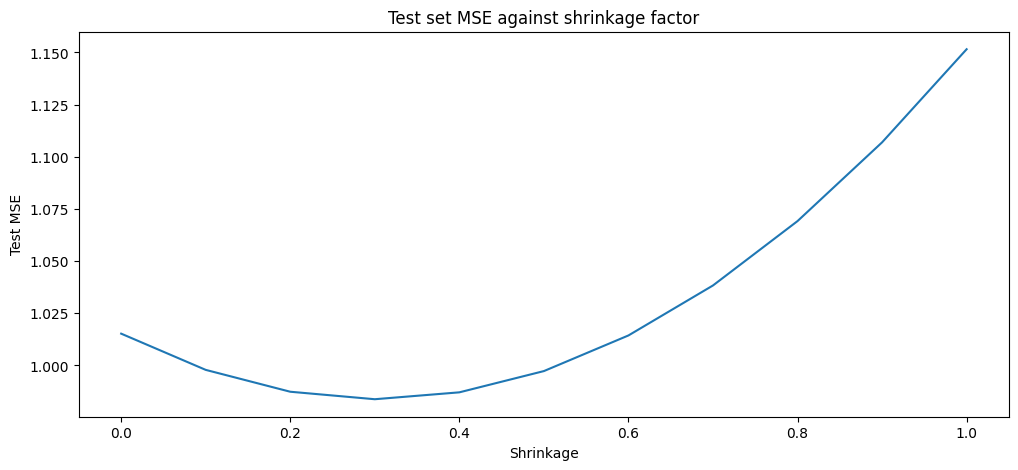

In [59]:
plt.figure(figsize=(12, 5))
plt.plot(df_MSE.s, df_MSE.MSE)
plt.title('Test set MSE against shrinkage factor')
plt.xlabel('Shrinkage')
plt.ylabel('Test MSE')

plt.show()

In [100]:
def getTestMSE(n_train):
    n_test = 10_000
    s_vec = np.linspace(0, 1, 11)

    shrinked_preds = {}
    for s in s_vec:
        values = {'MSE':[], 'beta':[]}
        for _ in range(100):
            df_train = generateData(n_train)
            df_test = generateData(n_test)

            reg = LinearRegression(fit_intercept=False).fit(df_train[["X"]], df_train[["y"]])
            coef = round(reg.coef_.item(), 3)

            y_hat = df_test['X'] * coef * s
            MSE = ((df_test['y'] - y_hat) ** 2).mean()

            values['MSE'].append(MSE)
            values['beta'].append(coef)
        
        shrinked_preds[s] = values
    
    return shrinked_preds

        
        

In [64]:
shrinked_preds = getTestMSE(50)
plot_dict = {s: fmean(value['MSE']) for s, value in shrinked_preds.items()}
df_MSE = pd.DataFrame({'s': plot_dict.keys(), 'MSE': plot_dict.values()})

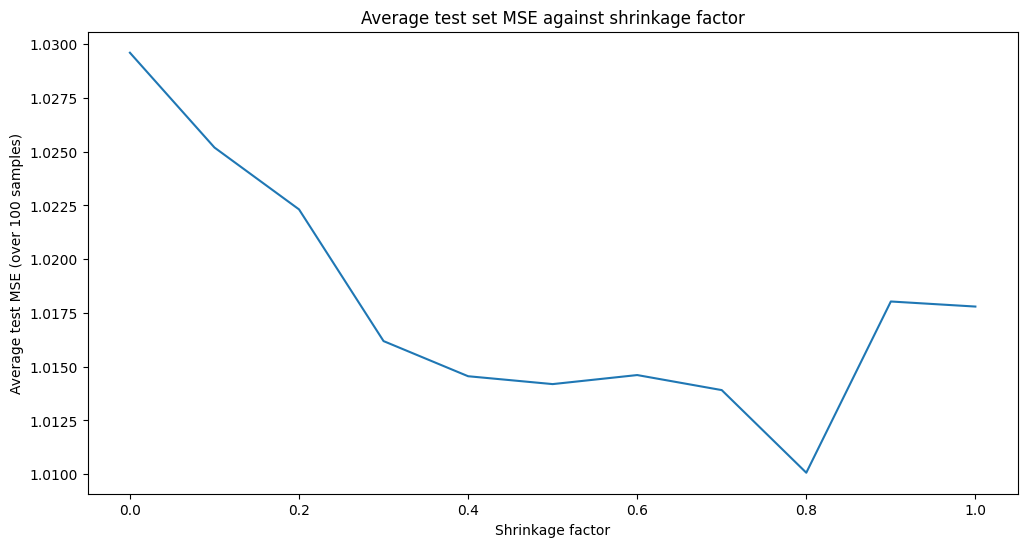

In [74]:
plt.figure(figsize=(12, 6))
plt.plot(df_MSE.s, df_MSE.MSE)
plt.title('Average test set MSE against shrinkage factor')
plt.xlabel('Shrinkage factor')
plt.ylabel('Average test MSE (over 100 samples)')

plt.show()

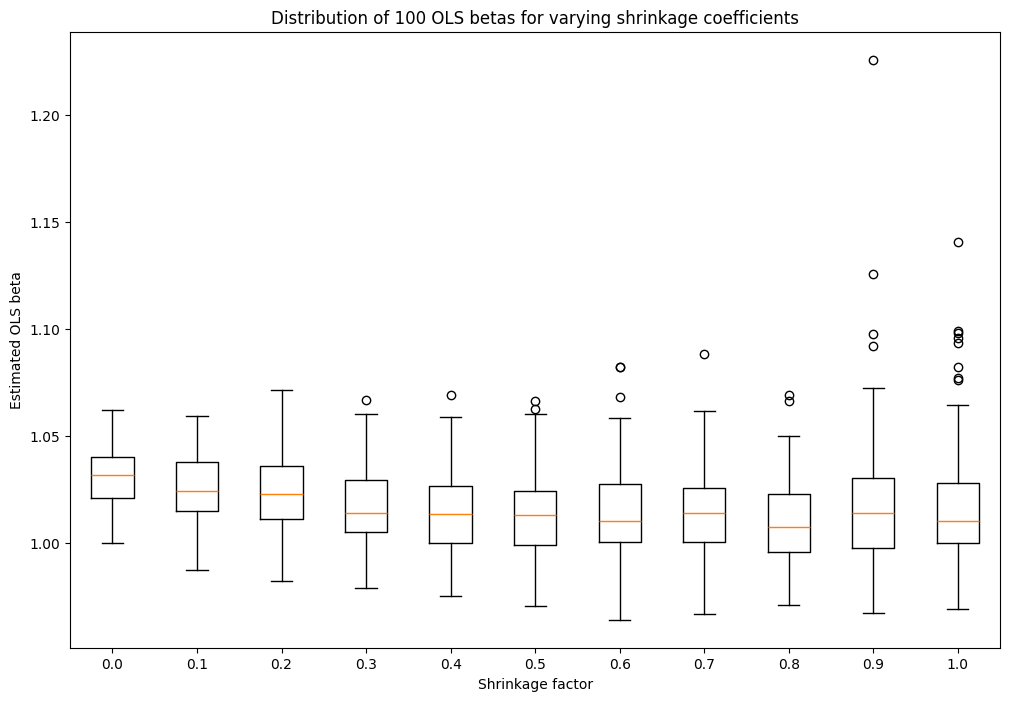

In [ ]:
beta_values = [val['MSE'] for val in shrinked_preds.values()]

plt.figure(figsize=(12, 8))

plt.boxplot(
    beta_values, 
    positions=range(11)
)
plt.xticks(range(11), [round(x, 1) for x in shrinked_preds.keys()])
plt.xlabel('Shrinkage factor')
plt.ylabel('Test set MSE')
plt.title('Distribution of 100 test set MSEs for varying shrinkage coefficients')

plt.show()

As we can see in the plot above, the median test MSE for s=0.8 is the lowest out of all the boxplots, indicating that over many repetitions the lowest bias is achieved at that shrinkage factor value. We also notice that compared to the closest boxes that also have a low median MSE, the s=0.8 box has the smallest inter-quartile range, revealing a lower variance than its neighbours. Taken together, these two observations fully explain why s=0.8 scored the lowest average MSE.

Let's now repeat the same experiment but this time with a training set containing 100 observations:

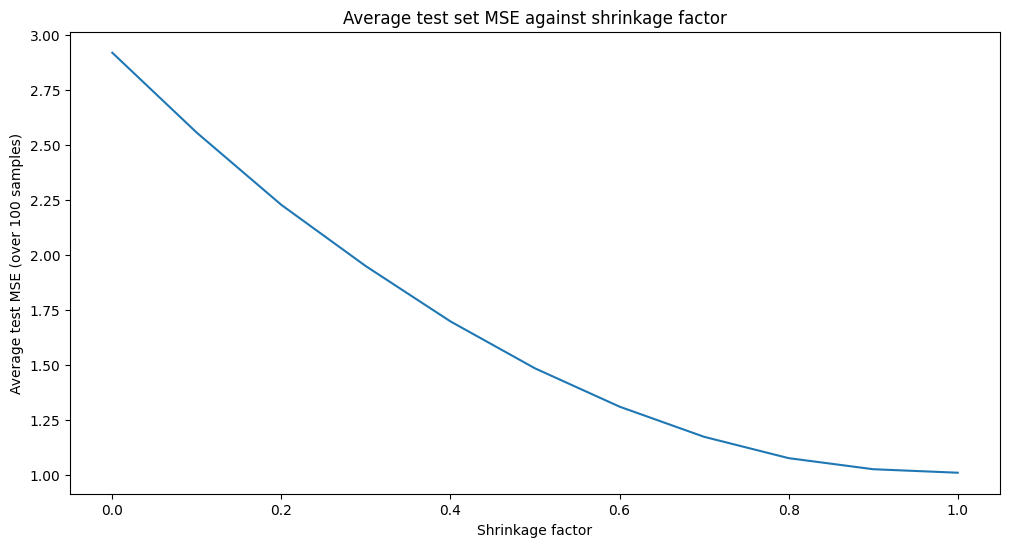

In [104]:
shrinked_preds = getTestMSE(100)
plot_dict = {s: fmean(value['MSE']) for s, value in shrinked_preds.items()}
df_MSE = pd.DataFrame({'s': plot_dict.keys(), 'MSE': plot_dict.values()})

plt.figure(figsize=(12, 6))
plt.plot(df_MSE.s, df_MSE.MSE)
plt.title('Average test set MSE against shrinkage factor')
plt.xlabel('Shrinkage factor')
plt.ylabel('Average test MSE (over 100 samples)')

plt.show()

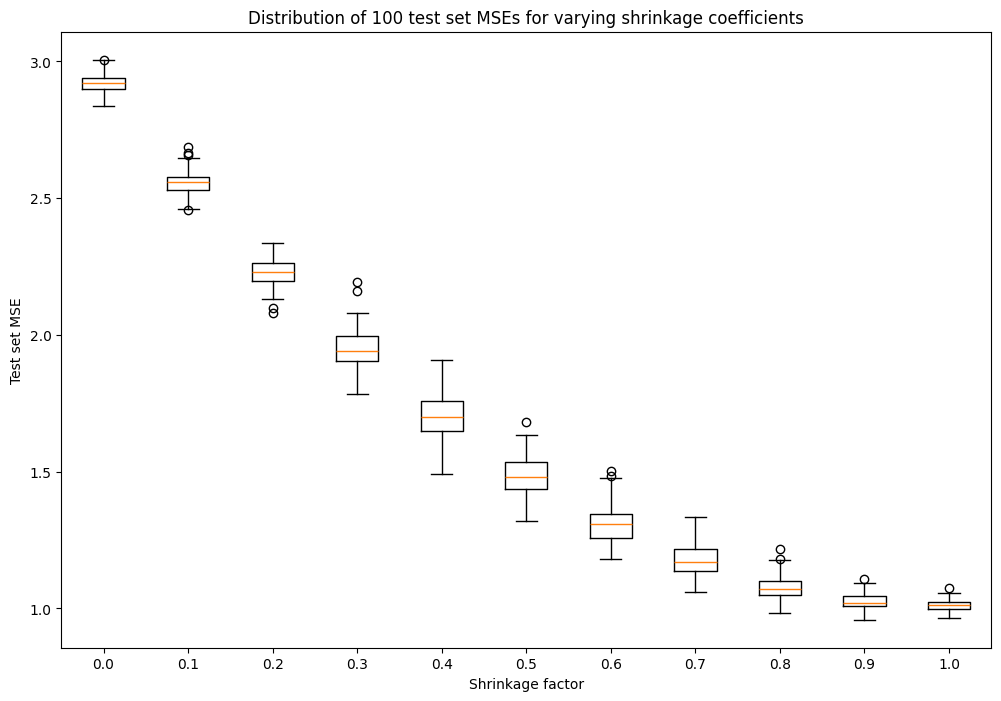

In [105]:
beta_values = [val['MSE'] for val in shrinked_preds.values()]

plt.figure(figsize=(12, 8))

plt.boxplot(
    beta_values, 
    positions=range(11)
)
plt.xticks(range(11), [round(x, 1) for x in shrinked_preds.keys()])
plt.xlabel('Shrinkage factor')
plt.ylabel('Test set MSE')
plt.title('Distribution of 100 test set MSEs for varying shrinkage coefficients')

plt.show()

The closer the slope gets to 1 (we started at 0.1), the higher the optimal shrinkage factor. When the slope is 0.2, it already jumps from s=0.8 to s=0.9, and tends toward 1 as the slope also tends toward 1.